In [1]:
import numpy as np
import pandas as pd
from numba import njit

# Functions

In [2]:
#Normalisation & standardization functions
min_max = lambda serie: (serie - np.min(serie)) / (np.max(serie) - np.min(serie))
mean_normalization = lambda serie: (serie - np.mean(serie)) / (np.max(serie) - np.min(serie))
standardization = lambda serie: (serie - np.mean(serie)) / np.std(serie)

#Activation functions
#@njit()
def sigmoid(x):
    big_out = np.where(x > 100, 100, x)
    small_out = np.where(big_out < -100, -100, big_out)
    return 1 / (1+ np.exp(-small_out))

#Loss functions
binary_crossentropy = lambda y_real, y_pred: -np.mean(y_real * np.log(y_pred + 1e-7) + (1-y_real) * np.log(1-y_pred + 1e-7))

In [3]:
df = pd.read_csv('winequality.csv')
df2 = min_max(df)

In [4]:
features = df2.loc[:,'fixed acidity':'alcohol']
target = df2['quality']

X = features.values.T
Y = target.values

X.shape, Y.shape

((11, 1599), (1599,))

In [355]:
learning_rate = 0.001
bias = 0
n_iterations = 1000
n_samples, n_features = X.shape
weights = np.zeros(n_features)
    
    
for _ in range(n_iterations):
    
        #Calculate predictions
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)
        
        #Update weights & biases
        #Calculate derivatives
        derivative_weights = np.dot(X.T, (y_predicted - Y)) / n_samples
        derivative_biases = 2 * np.sum(y_predicted - Y) / n_samples
        
        #Update the values
        weights = weights - learning_rate * derivative_weights
        bias = bias - learning_rate * derivative_biases    

In [347]:
def iterate(n_iterations, learning_rate=0.0001, bias=0, n_samples=X.shape[0], n_features=X.shape[1], weights = np.zeros(n_features)):
    
    for _ in range(n_iterations):
    
        #Calculate predictions
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)
        
        #Update weights & biases
        #Calculate derivatives
        derivative_weights = np.dot(X.T, (y_predicted - Y)) / n_samples
        derivative_biases = 2 * np.sum(y_predicted - Y) / n_samples
        
        #Update the values
        weights = weights - learning_rate * derivative_weights
        bias = bias - learning_rate * derivative_biases
    
    return weights, bias     

# Multi-layered Model
<img src='net.png' width='500px'>

In [117]:
dSigmoid = lambda x: x * (1-sigmoid(x))

## Parameters

In [146]:
learning_rate = 0.0001
n_features, n_samples = X.shape
layers = [n_features, 100, 20, 1]
print(layers)

[11, 100, 20, 1]


## Initiate weights & Biases

In [ ]:
#Initiate weights & biases
model = {'W':{}, 'B':{}}


for layer, nodes in enumerate(layers):
    
    #First layer doesn't have weights & biases
    if layer == 0:
        pass 
    else:
        model['W'][layer] = np.random.randn(layers[layer], layers[layer-1]) / np.sqrt(layers[layer-1])
        model['B'][layer] = np.zeros((layers[layer], 1)) 

In [131]:




model['Z'], model['A'] = {}, {0:X}

model['dLoss'] = {}
model['dLoss']['Z'], model['dLoss']['A'], model['dLoss']['W'], model['dLoss']['B'],= {}, {}, {}, {}


for _ in range(1000):

    #Forwards
    for layer, nodes in enumerate(layers):
        if layer == 0:
            pass 
        else:
            model['Z'][layer] = (model['W'][layer]).dot(model['A'][layer-1]) + model['B'][layer]
            model['A'][layer] = sigmoid(model['Z'][layer])
        
    y_pred = model['A'][len(model['A'])-1]     

    #Backwards
    dLoss_Y_pred = model['dLoss']['A'][len(layers)-1] =(- Y / y_pred) - ((1-Y)/(1-y_pred))
    
    for layer in range(len(layers)-1,0,-1):
        model['dLoss']['Z'][layer] = model['dLoss']['A'][layer] * dSigmoid(model['A'][layer])
        model['dLoss']['A'][layer-1] = np.dot(model['W'][layer].T, model['dLoss']['Z'][layer])
        model['dLoss']['W'][layer] =  1 / model['A'][layer-1].shape[1] * np.dot(model['dLoss']['Z'][layer], model['A'][layer-1].T)
        model['dLoss']['B'][layer] =  1 / model['A'][layer-1].shape[1] * np.dot(model['dLoss']['Z'][layer], np.ones([model['dLoss']['Z'][layer].shape[1], 1]))
        
        model['W'][layer] -= learning_rate * model['dLoss']['W'][layer]
        model['W'][layer] -= learning_rate * model['dLoss']['B'][layer]

    loss = binary_crossentropy(model['A'][len(model['A'])-1], Y)
    print(loss)


[11, 100, 20, 1]
0.867393005437108
0.8673533800976083
0.8673137455034364
0.8672741016545114
0.8672344485507514
0.867194786192073
0.867155114578392
0.8671154337096235
0.867075743585681
0.8670360442064771
0.8669963355719236
0.8669566176819307
0.8669168905364079
0.8668771541352637
0.866837408478405
0.8667976535657382
0.8667578893971682
0.8667181159725988
0.8666783332919334
0.8666385413550729
0.8665987401619183
0.8665589297123686
0.8665191100063225
0.8664792810436772
0.8664394428243285
0.8663995953481715
0.8663597386150993
0.8663198726250052
0.8662799973777804
0.8662401128733148
0.8662002191114975
0.8661603160922167
0.8661204038153588
0.8660804822808095
0.8660405514884527
0.866000611438172
0.8659606621298487
0.8659207035633641
0.8658807357385975
0.8658407586554268
0.8658007723137293
0.8657607767133807
0.8657207718542557
0.8656807577362273
0.865640734359168
0.8656007017229481
0.8655606598274376
0.8655206086725047
0.8654805482580162
0.865440478583838
0.8654003996498346
0.8653603114558691
0.8

<AxesSubplot:>

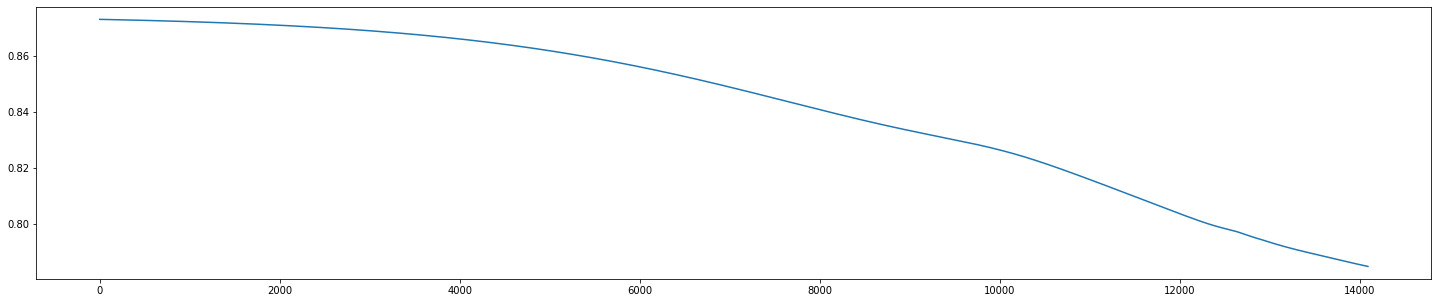

In [24]:
pd.Series(loss_log).plot(figsize=(25,5))